In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [67]:
df=pd.read_csv('Quikr_car.csv')
df.sample(100)

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
658,658,Maruti Suzuki Swift Vxi - 2017,PLATINUM,Chennai,"₹5,62,399","33,094 kms",Petrol,2nd Owner,2017,Maruti
981,981,Chevrolet Beat - 2011,GOLD,Chennai,"₹86,000","56,000 kms",Petrol,NaN,2011,Chevrolet
156,156,Maruti Suzuki S Cross - 2017,PLATINUM,Pune,"₹9,92,199","69,524 kms",Diesel,2nd Owner,2017,Maruti
333,333,Mahindra TUV300 T8 AMT - 2016,GOLD,Chennai,"₹6,90,000","52,123 kms",Diesel,NaN,2016,Mahindra
214,214,Maruti Suzuki Alto - 2007,GOLD,Chennai,"₹69,000","58,000 kms",Petrol,NaN,2007,Maruti
...,...,...,...,...,...,...,...,...,...,...
9,9,Hyundai Elite i20 Asta 1.2 - 2017,PLATINUM,Pune,"₹7,30,899","13,687 kms",Petrol,1st Owner,2017,Hyundai
63,63,Ford Ecosport - 2016,PLATINUM,Chennai,"₹6,56,699","53,306 kms",Diesel,2nd Owner,2016,Ford
990,990,Maruti Suzuki Alto 800 Lxi - 2017,PLATINUM,Pune,"₹3,33,699","11,917 kms",Petrol,2nd Owner,2017,Maruti
318,318,Maruti Suzuki Wagon R Duo - 2017,PLATINUM,Chennai,"₹4,73,899","30,467 kms",Petrol,1st Owner,2017,Maruti


In [68]:
df['Company'].value_counts()

Maruti        384
Hyundai       228
Honda          79
Ford           51
Tata           44
Renault        43
Mahindra       42
Toyota         41
Volkswagen     29
MG             17
Chevrolet      11
Jeep           10
Kia            10
BMW             7
Skoda           7
Datsun          5
Nissan          5
Audi            5
Mercedes        4
Fiat            3
Jaguar          2
Volvo           2
Land            1
Porsche         1
Ssangyong       1
Name: Company, dtype: int64

In [69]:
df.shape

(1032, 10)

In [70]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Label           0
Location        2
Price           0
Kms_driven      0
Fuel_type       0
Owner         292
Year            0
Company         0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1032 non-null   int64 
 1   Name        1032 non-null   object
 2   Label       1032 non-null   object
 3   Location    1030 non-null   object
 4   Price       1032 non-null   object
 5   Kms_driven  1032 non-null   object
 6   Fuel_type   1032 non-null   object
 7   Owner       740 non-null    object
 8   Year        1032 non-null   int64 
 9   Company     1032 non-null   object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


In [72]:
df= df.drop(columns = 'Owner')
df.sample(5)

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
948,948,Maruti Suzuki Baleno - 2019,PLATINUM,Pune,"₹6,75,799","16,002 kms",Petrol,2019,Maruti
192,192,Maruti Suzuki Alto K10 VXi AMT - 2015,PLATINUM,Pune,"₹3,51,699","58,771 kms",Petrol,2015,Maruti
1020,1020,Datsun Redi GO - 2018,PLATINUM,Bangalore,"₹4,15,699","26,527 kms",Petrol,2018,Datsun
734,734,Maruti Suzuki Celerio VXi - 2014,PLATINUM,Bangalore,"₹4,14,199","58,762 kms",Petrol,2014,Maruti
724,724,Maruti Suzuki Wagon R 1.0 Vxi - 2014,PLATINUM,Chennai,"₹3,75,899","54,645 kms",Petrol,2014,Maruti


In [73]:
df['Name']=df['Name'].str.split(" ").str.slice(0,3).str.join(" ")

In [74]:
df.sample(5)

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
754,754,MG Motors Hector,PLATINUM,Bangalore,"₹16,81,899","6,760 kms",Petrol,2020,MG
61,61,Hyundai Elite i20,PLATINUM,Pune,"₹5,49,899","70,646 kms",Petrol,2014,Hyundai
532,532,Maruti Suzuki Eeco,PLATINUM,Bangalore,"₹4,80,399","24,416 kms",Petrol,2019,Maruti
540,540,Honda Jazz -,PLATINUM,Chennai,"₹5,86,699","36,244 kms",Petrol,2016,Honda
568,568,Ford EcoSport Trend,GOLD,Pune,"₹6,00,000","52,000 kms",Diesel,2016,Ford


In [75]:
df['Price'] = df['Price'].str.replace(',','').str.split('₹').str.get(1)

In [76]:
df.head(5)

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,0,Ford Figo Duratec,PLATINUM,Bangalore,380000,"35,056 kms",Petrol,2015,Ford
1,1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,"44,000 kms",Petrol,2016,Maruti
2,2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,"42,917 kms",Petrol,2018,Hyundai
3,3,Hyundai Venue -,PLATINUM,Chennai,1019699,"16,112 kms",Petrol,2019,Hyundai
4,4,Honda Jazz -,PLATINUM,Pune,713499,"30,988 kms",Petrol,2017,Honda


In [77]:
df=df.dropna()

In [78]:
df['Price']=df['Price'].astype(int)

In [79]:
df['Kms_driven'] = df['Kms_driven'].str.replace(',','').str.split('kms').str.get(0)

In [80]:
df.head(5)

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2017,Honda


In [81]:
df=df.drop(columns='Unnamed: 0')

In [82]:
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,2014,Hyundai
1028,Maruti Suzuki Alto,GOLD,Bangalore,275000,60000,Petrol,2014,Maruti
1029,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,2017,Jeep
1030,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,2017,Jeep


In [83]:
df.reset_index(drop=True , inplace=True)
df.head(5)

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2017,Honda


In [84]:
car=df.copy(deep=True)

In [85]:
car

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...,...
1019,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,2014,Hyundai
1020,Maruti Suzuki Alto,GOLD,Bangalore,275000,60000,Petrol,2014,Maruti
1021,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,2017,Jeep
1022,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,2017,Jeep


C:\Users\Bilal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


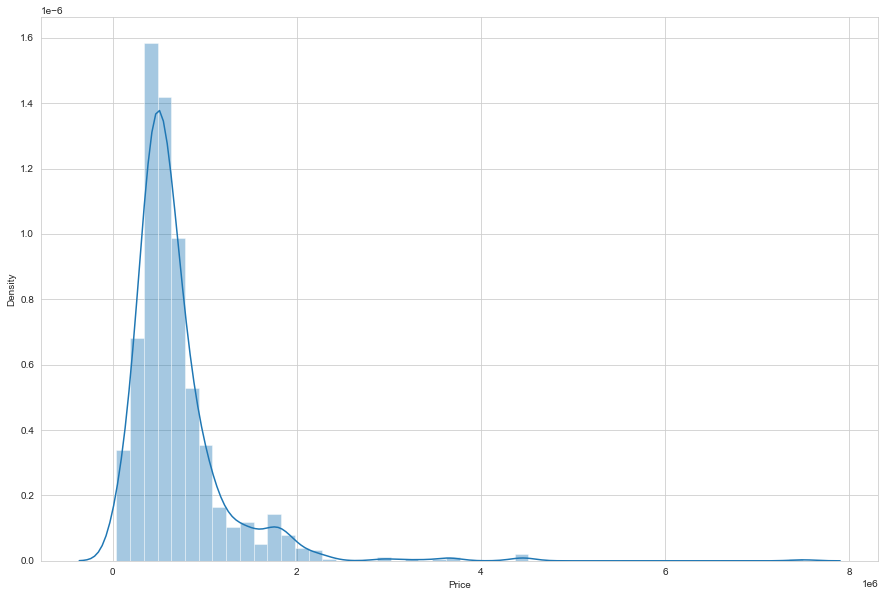

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(car.Price)
plt.show()

In [87]:
X=car.drop(columns='Price')
y=car['Price']

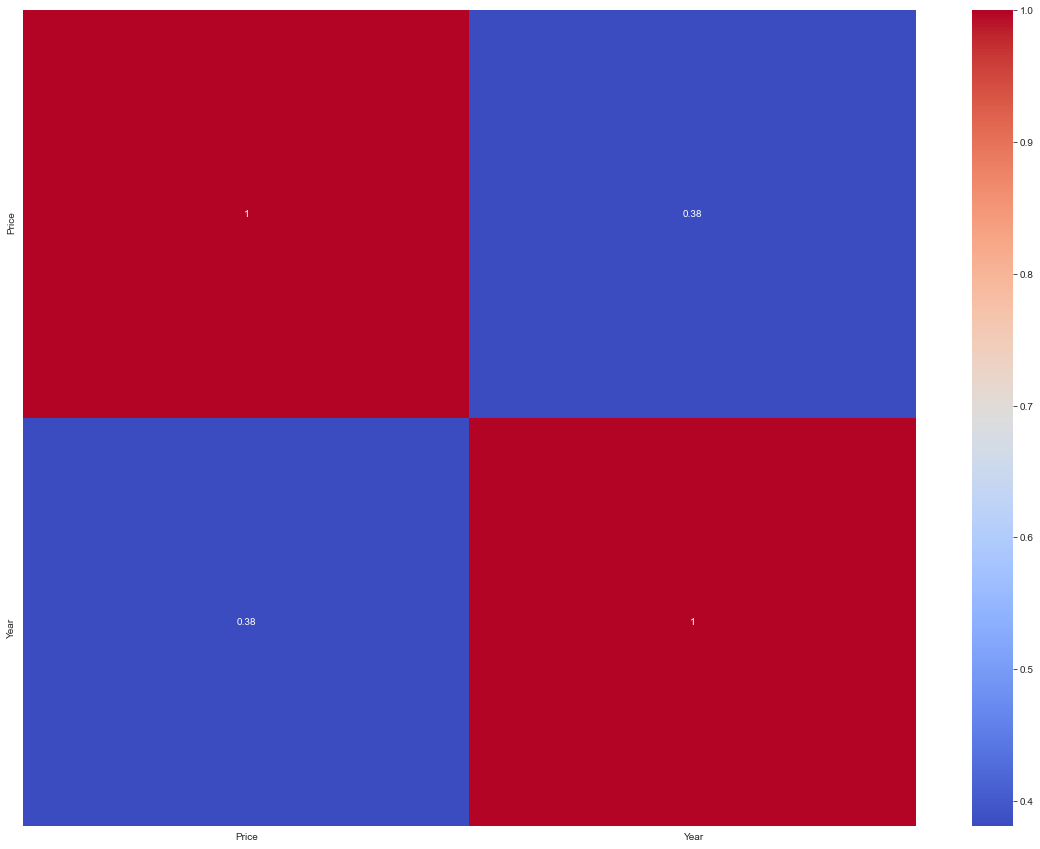

In [88]:
plt.figure(figsize=(20, 15))
correlations = car.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

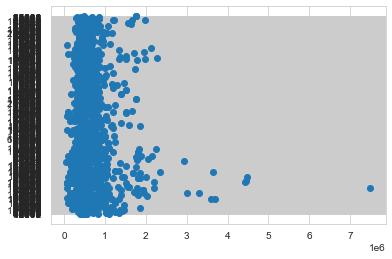

In [89]:
fig, (Graph) = plt.subplots()
Graph.scatter(car['Price'], car['Kms_driven'])
plt.show()


In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1601)


In [100]:
ohe = OneHotEncoder()
ohe.fit(X[['Name','Company','Fuel_type','Location']])


OneHotEncoder()

In [99]:
transformer=make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['Name','Company','Fuel_type','Location']),
    (OrdinalEncoder(categories=[['PLATINUM','GOLD']]),['Label']),
    (StandardScaler(),['Kms_driven']),
    remainder='passthrough')

In [97]:
lr=LinearRegression()

In [98]:
pipe=make_pipeline(transformer,lr)

In [105]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q3 -', 'Audi Q5 2.0', 'Audi Q7 3.0', 'Audi Q7 35',
       'BMW 3 Series', 'BMW 5 Series', 'BMW X5 xDrive30d',
       'Chevrolet Aveo -', 'Chevrolet Beat -', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Cruze LTZ', 'Chevrolet Optra -',
       'Chevrolet S...
       'Mahasamund', 'Malappuram', 'Mumbai', 'Muzaffarnagar', 'Nagpur',
       'Nanded', 'NaviMumbai', 'Pondicherry', 'Pune', 'Surat', 'Thane',
       'Trichy', 'Udaipur', 'Uttarpara'], dtype=object)]),
                                                  ['Name', 'Company',
                                                   'Fuel_type', 'Location']),
                                                 ('ordinalencoder',
                                                  Ordi

In [108]:
y_pred=pipe.predict(X_test)

In [107]:
r2_score(y_test,y_pred)

0.4908900048371817